# Title: **Recomendation System - Movies, Music & Books**

## Milestone 1 Report: Session-Based Recommendation System

The objective of this project is to build a **session-based recommendation system** that suggests movies, music, and books to users based on their interactions with the interface and preferences. This project will use 3 datasets from Hugging Face. There will be an interactive user-interface of website will be developed for this application.

### **Technology Stack**

-  **Frontend**: React, CSS

-  **Backend**: Flask

-  **Machine Learning Frameworks**: PyTorch, transformers

-  **Databases**: PostgreSQL / MongoDB (TBD based on requirements)

-  **APIs & Libraries**: Hugging Face Transformers, Pandas, NumPy, Matplotlib, Seaborn

### **Datasets(Hugging Face)**

-  **Movies**: [IMDb Dataset](https://huggingface.co/datasets/ExecuteAutomation/ImdbMovieDataSet)

-  **Music**: [Spotify Tracklist Dataset](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset?library=datasets)

-  **Books**: [GoodReads Dataset](https://huggingface.co/datasets/Eitanli/goodreads?library=datasets)


## **Project Timeline**
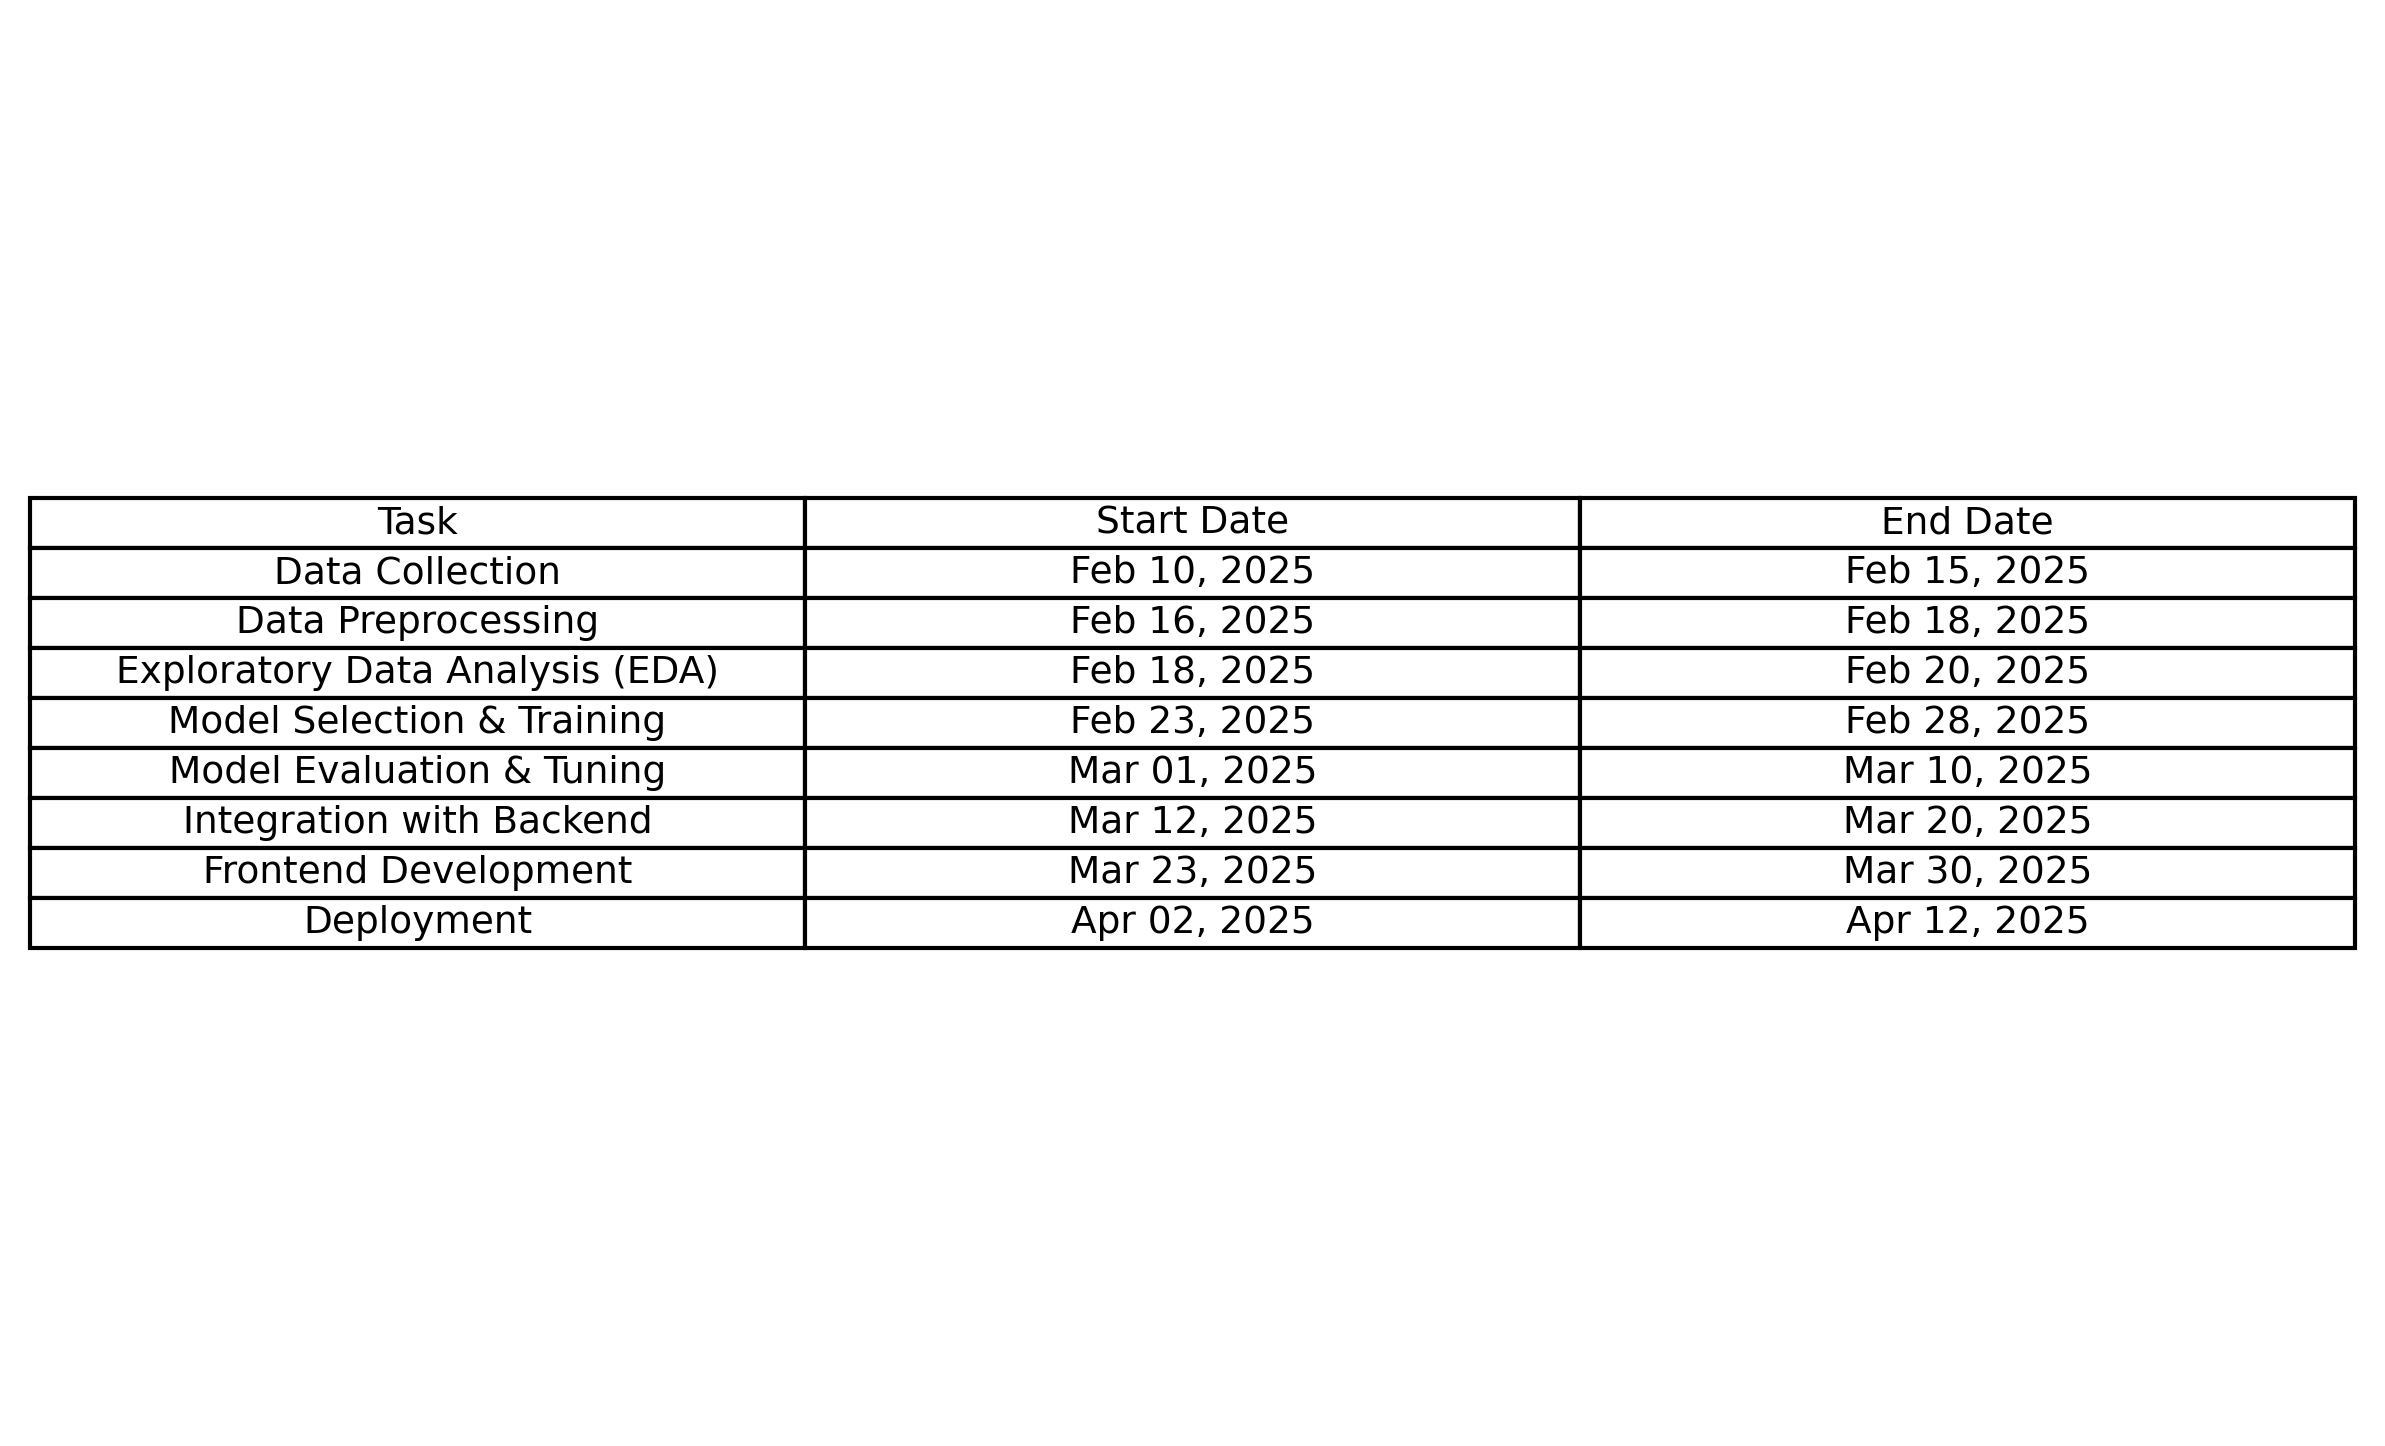

## **Data Loading**

In [2]:
#!pip install datasets

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [11]:
movies_data = load_dataset("ExecuteAutomation/ImdbMovieDataSet")

In [12]:
print(movies_data['train'])

Dataset({
    features: ['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
    num_rows: 10178
})


In [13]:
music_data = load_dataset("maharshipandya/spotify-tracks-dataset")

README.md:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

dataset.csv:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/114000 [00:00<?, ? examples/s]

In [14]:
print(music_data['train'])

Dataset({
    features: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'],
    num_rows: 114000
})


In [15]:
books_data = load_dataset("Eitanli/goodreads")

README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


goodreads_data.csv:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [16]:
print(books_data["train"])

Dataset({
    features: ['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating', 'Num_Ratings', 'URL'],
    num_rows: 10000
})


## **Movies Dataset Preprocessing & Visualization**

In [25]:
movies_df = movies_data['train'].to_pandas()
movies_df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [18]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [19]:
movies_df.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [20]:
# filling NaN values
movies_df["genre"].fillna("Unknown", inplace=True)

movies_df["crew"].fillna("Not Available", inplace=True)

# Split Genres (Multiple genres in one column)
movies_df["genre"] = movies_df["genre"].str.split(",")

In [21]:
movies_df["date_x"] = movies_df["date_x"].str.strip()

movies_df["date_x"].replace("", np.nan, inplace=True)

movies_df["date_x"] = pd.to_datetime(movies_df["date_x"], errors="coerce", format="%m/%d/%Y")


In [22]:
movies_df["year"] = movies_df["date_x"].dt.year

In [23]:
movies_df_exploded = movies_df.explode("genre")

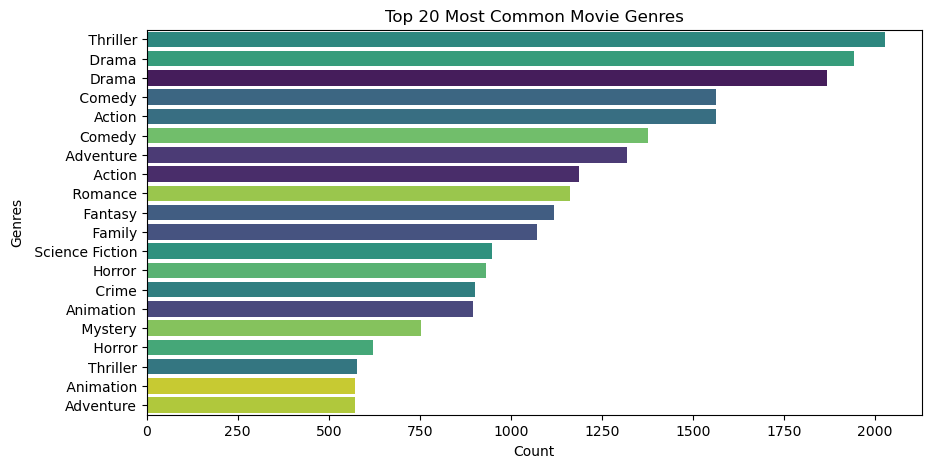

In [24]:
top_20_genres = movies_df_exploded["genre"].value_counts().index[:20]  # Select top 20 genres
y = movies_df_exploded[movies_df_exploded["genre"].isin(top_20_genres)]["genre"]
plt.figure(figsize=(10, 5))
sns.countplot(y=y,
              order=top_20_genres,
              hue=y,
              palette="viridis")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 20 Most Common Movie Genres")
plt.show()


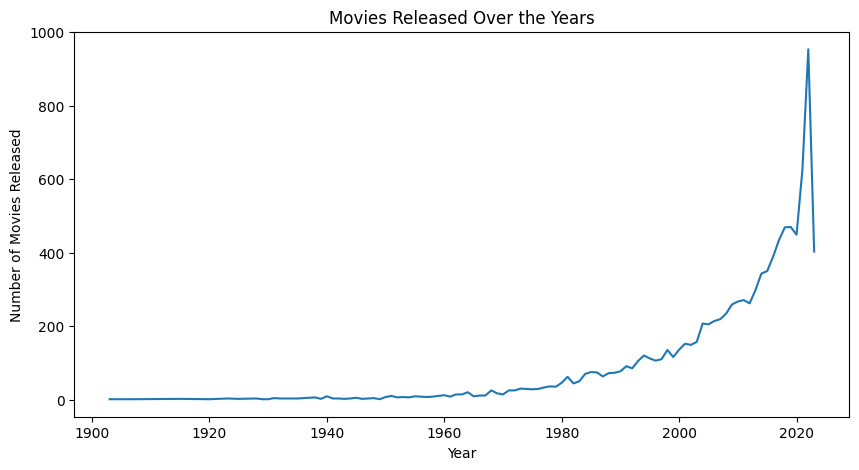

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=movies_df["year"].value_counts().index, y=movies_df["year"].value_counts().values)
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Movies Released Over the Years")
plt.show()


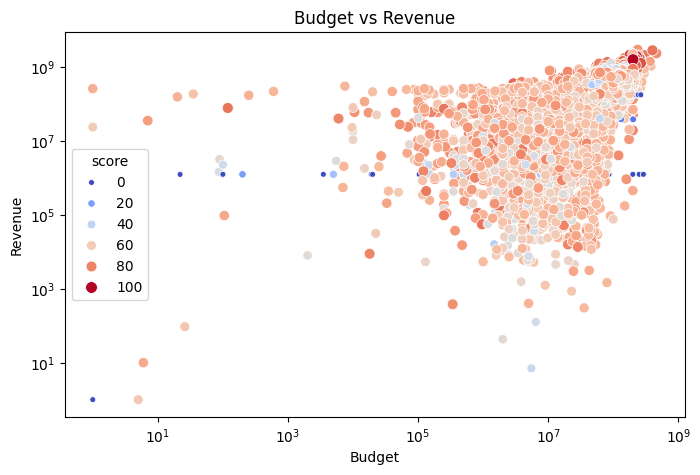

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=movies_df, x="budget_x", y="revenue", hue="score", size="score", palette="coolwarm")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.xscale("log")
plt.yscale("log")
plt.show()

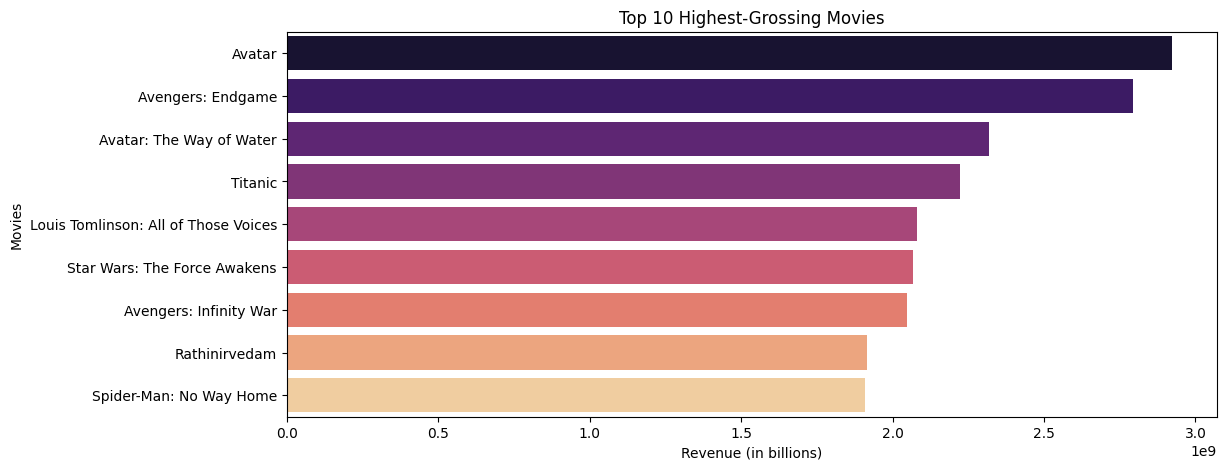

In [73]:
top_movies = movies_df.nlargest(10, "revenue")

plt.figure(figsize=(12, 5))
sns.barplot(y=top_movies["names"], x=top_movies["revenue"], hue=top_movies["names"], palette="magma", legend=False)
plt.xlabel("Revenue (in billions)")
plt.ylabel("Movies")
plt.title("Top 10 Highest-Grossing Movies")
plt.show()


<ipython-input-28-aca4fd3874a2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_crew["Name"], x=top_crew["Count"], palette="plasma")


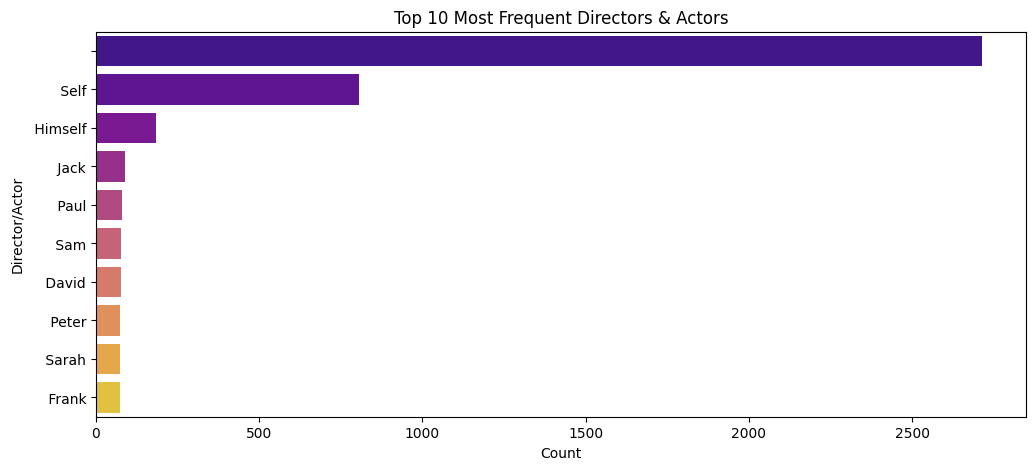

In [ ]:
from collections import Counter

# Flatten list of crew members
crew_list = movies_df["crew"].dropna().str.split(",").explode()
top_crew = pd.DataFrame(Counter(crew_list).most_common(10), columns=["Name", "Count"])

plt.figure(figsize=(12, 5))
sns.barplot(y=top_crew["Name"], x=top_crew["Count"], palette="plasma")
plt.xlabel("Count")
plt.ylabel("Director/Actor")
plt.title("Top 10 Most Frequent Directors & Actors")
plt.show()


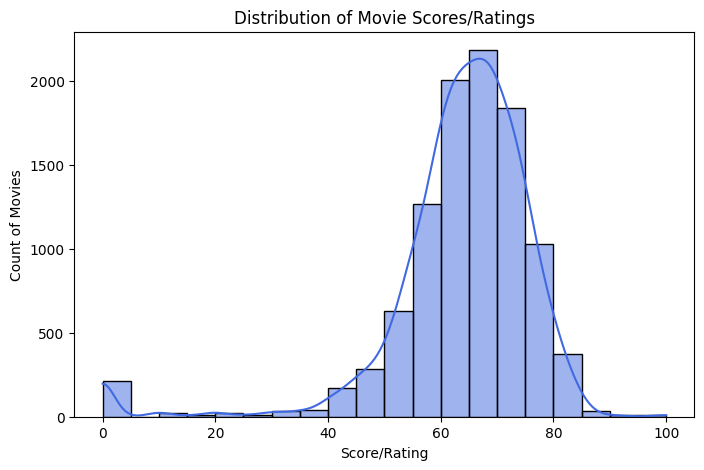

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(movies_df["score"], bins=20, kde=True, color="royalblue")
plt.xlabel("Score/Rating")
plt.ylabel("Count of Movies")
plt.title("Distribution of Movie Scores/Ratings")
plt.show()


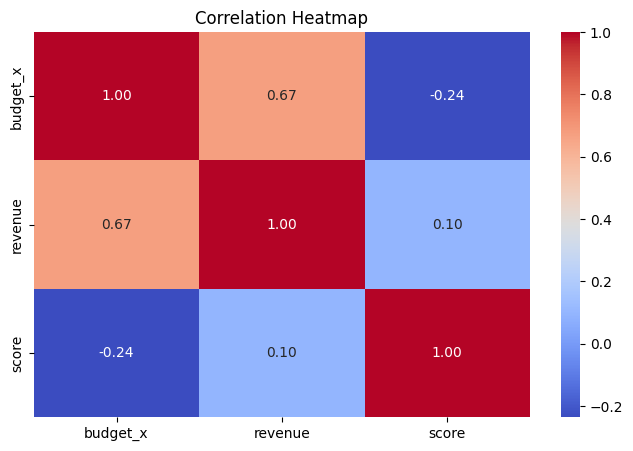

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(movies_df[["budget_x", "revenue", "score"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Music Dataset Preprocessing & Visualizations**

In [ ]:
music_df = music_data["train"].to_pandas()
music_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [33]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [34]:
music_df.isna().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [36]:
music_df.drop({"Unnamed: 0"}, axis=1, inplace=True)

# Drop missing values
music_df.dropna(inplace=True)

# Convert duration from milliseconds to minutes
music_df["duration_min"] = music_df["duration_ms"] / 60000

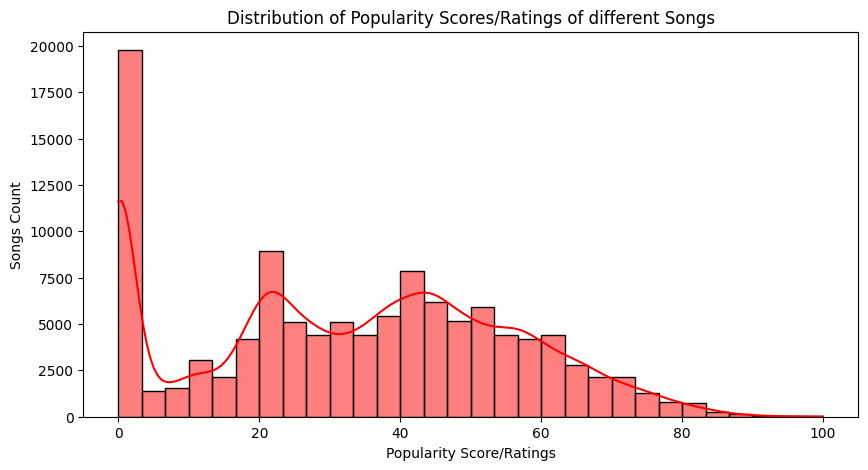

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(music_df["popularity"], bins=30, kde=True, color="red")
plt.xlabel("Popularity Score/Ratings")
plt.ylabel("Songs Count")
plt.title("Distribution of Popularity Scores/Ratings of different Songs")
plt.show()

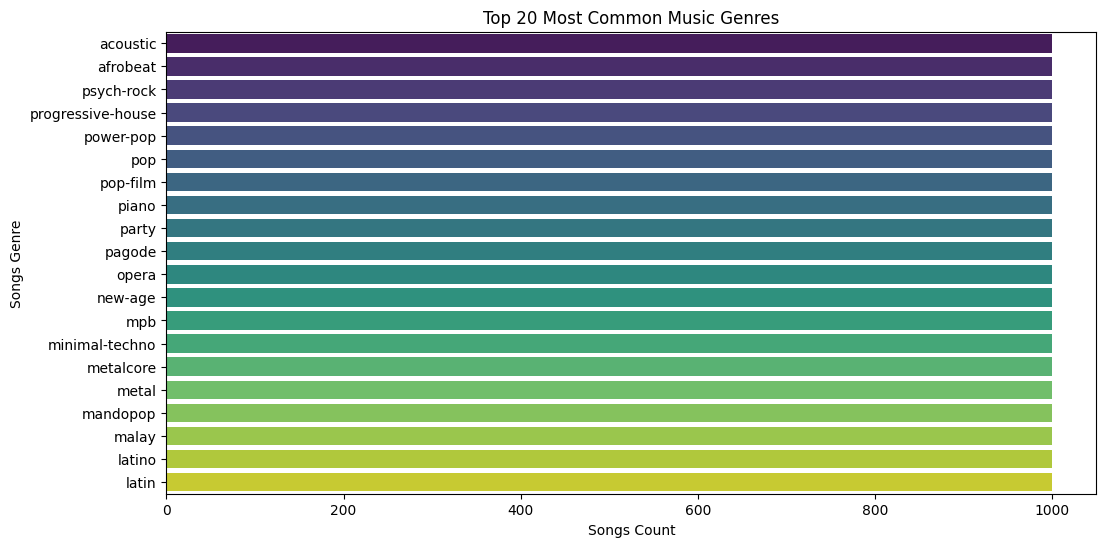

In [69]:
plt.figure(figsize=(12, 6))
top_genres = music_df["track_genre"].value_counts().head(20)
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette="viridis", legend=False)
plt.xlabel("Songs Count")
plt.ylabel("Songs Genre")
plt.title("Top 20 Most Common Music Genres")
plt.show()

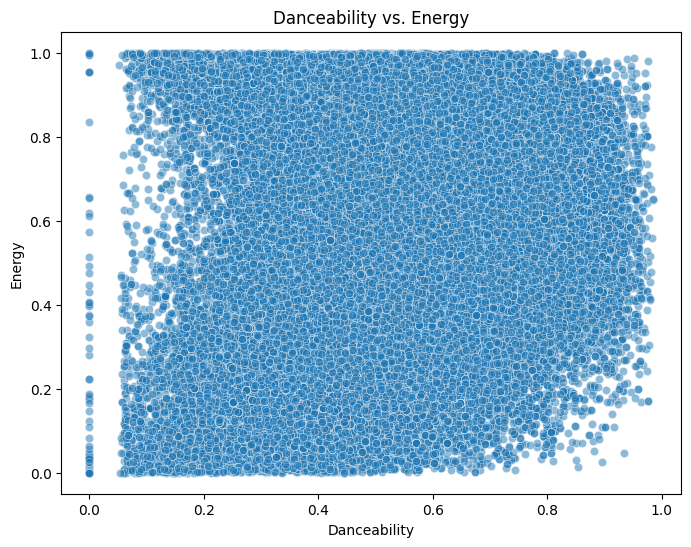

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=music_df["danceability"], y=music_df["energy"], alpha=0.5)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability vs. Energy")
plt.show();

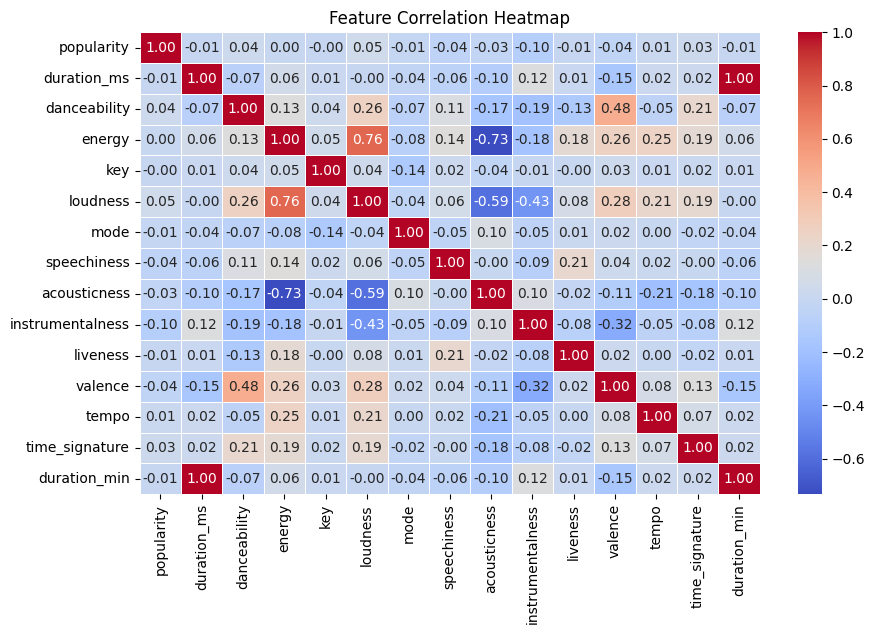

In [46]:
numeric_cols = music_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## **Books Dataset Preprocesssing & Visualizations**

In [65]:
books_df = books_data["train"].to_pandas()
books_df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [48]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [66]:
import ast
books_df['Num_Ratings'] = books_df['Num_Ratings'].apply(lambda x: int(x.replace(',', '')))

books_df.fillna({'Description':"No Description Available"}, inplace=True)

books_df['Genres'] = books_df['Genres'].apply(lambda x: ast.literal_eval(x))

genres_exploded = books_df.explode('Genres')

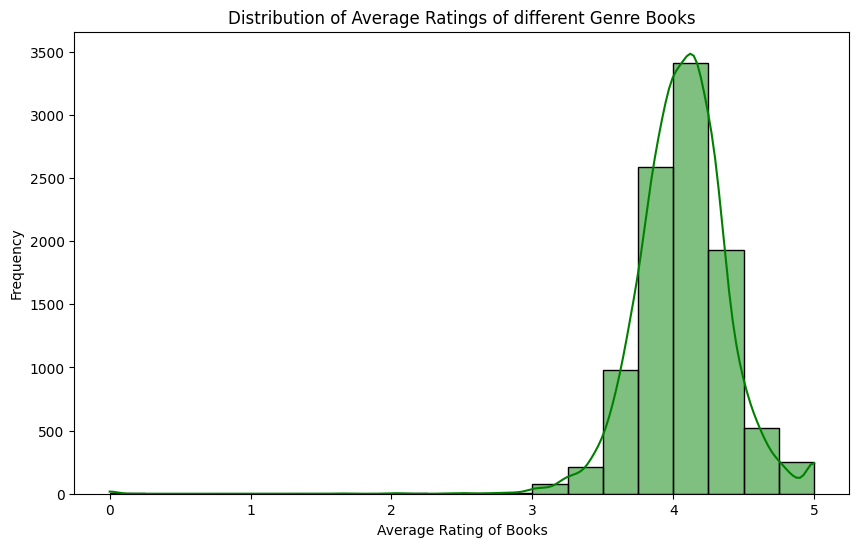

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(books_df['Avg_Rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Average Ratings of different Genre Books')
plt.xlabel('Average Rating of Books')
plt.ylabel('Frequency')
plt.show()

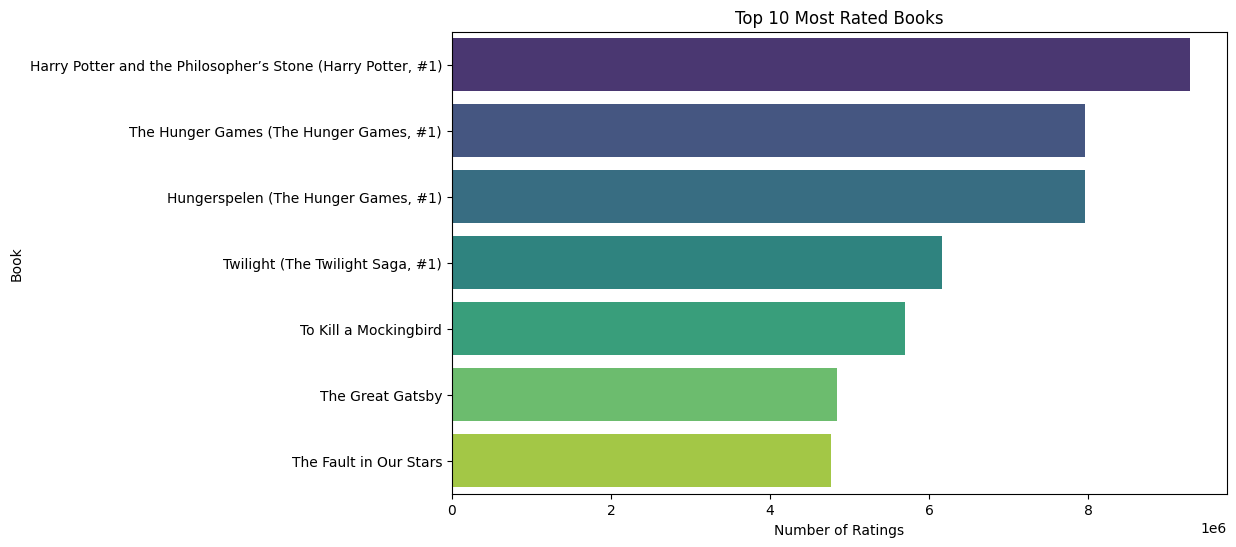

In [67]:
top_rated_books = books_df.nlargest(10, 'Num_Ratings')

plt.figure(figsize=(10, 6))
sns.barplot(x='Num_Ratings', y='Book', data=top_rated_books,hue="Book", palette='viridis', legend=False)
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book')
plt.show()

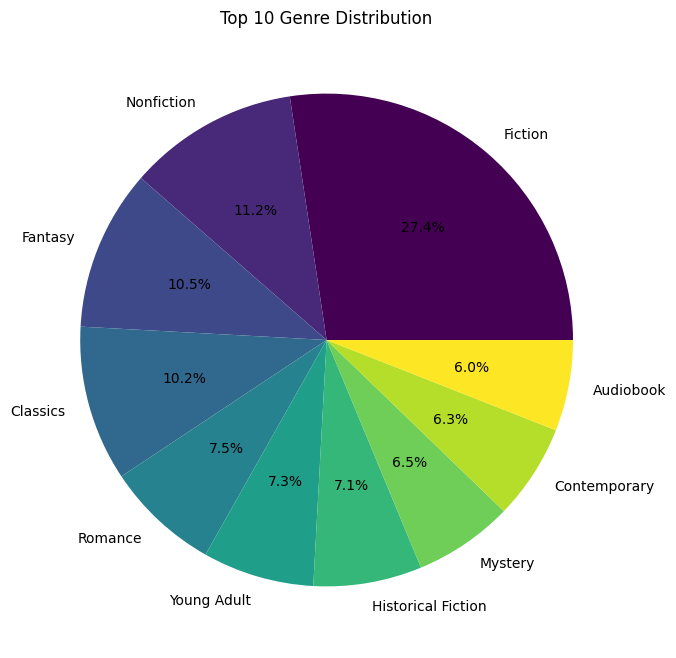

In [60]:
# Genre Distribution (Top 10 genres)
top_genres_pie = books_df['Genres'].explode().value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
top_genres_pie.plot.pie(autopct='%1.1f%%', cmap='viridis', legend=False)
plt.title('Top 10 Genre Distribution')
plt.ylabel('')
plt.show()


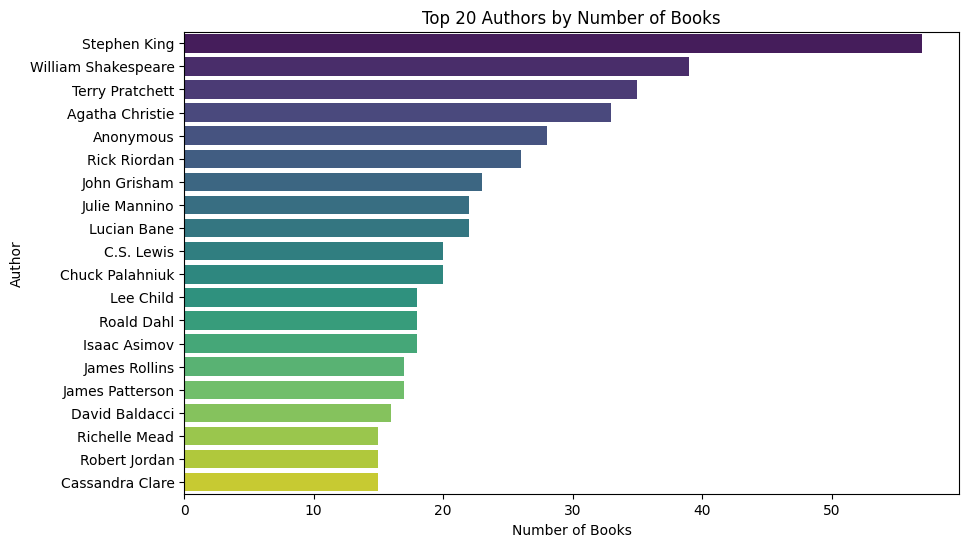

In [68]:
top_authors = books_df['Author'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, hue=top_authors.index, palette='viridis', legend=False)
plt.title('Top 20 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


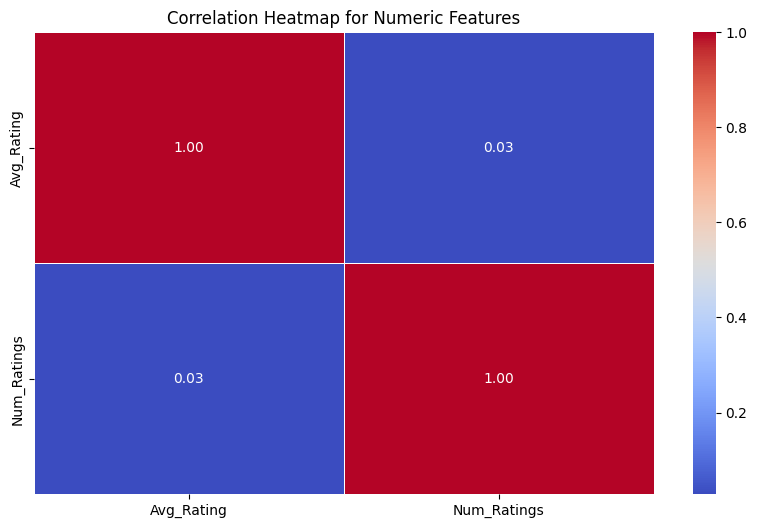

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(books_df[['Avg_Rating', 'Num_Ratings']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()
